# Лабораторная работа №4

ФИО:  **Йолсал Дениз Хайреттинович**   
Группа: **БИВТ-20-3**  
Вариант: **jbarat/plant_species**

Отправлять можно следующими способами (**обязательно указать свое ФИО и группу в каком-либо виде**):
1. Создать **приватный** репозиторий на github, добавить меня по нику (l3lush) в Collaborators (Settings -> Collaborators -> Add people)
2. Отправить заполненный ноутбук мне на почту avmysh@gmail.com, либо m1603956@edu.misis.ru
3. Отправить заполненный ноутбук мне в тг @l3lush. 

**Deadline**:
- hard -- **04.06.2023 23:59** (дедлайн теперь один)


**Что необходимо сделать** (можете вдохновляться ноутбуками для семинара, они должны помочь):
1. Загрузить датасет (вариант смотреть [здесь](https://docs.google.com/spreadsheets/d/1pFk1qZJtMrV8GWUmdSjV5Kz6JnFdBQDShErFZ337FDc/edit?usp=sharing))
2. Описать кратенько словами датасет, описать поставку задачи, что от чего отличаем, привести примеры картинок (картинки можно визуализировать после шага 3, когда у вас будет красивый датасет).
3. Оформить датасет в виде объекта класса Dataset из PyTorch (обязательно надо сделать препроцессинг данных: нормализовать данные, добавить аугментации к данным и пр.).
4. Оформить датасет из шага 3 в Dataloader.
5. Реализовать архитектуру собственной нейросети и натренировать ее на датасете (можно не обучать 1000 эпох, достаточно 10 эпох, но чтобы метрики начали улучшаться).
6. Обучить нейросеть, используя Transfer Learning. Модель можно выбрать на свой вкус (список всех моделей, доступных в torchvision есть [тут](https://pytorch.org/vision/stable/models.html)).
7. Посчитать метрики качества финальной модели, сделать выводы.

**Замечание**  
Если понимаете, что данные слишком много весят, или с датасетом что-то не так, можете брать любой другой.  

P.S. Чтобы не ждать века, тренируйте модели на Colab с использованием GPU (Runtime -> Change runtime type -> GPU)  
P.S.S. Сохраняйте вывод ячеек и пушьте вместе с ним, в противном случае я не смогу нормально проверить все работы, если буду запускать все ноутбуки и ждать обучение моделей

# Пример, как загружать данные

In [1]:
# in Colab
#!pip install datasets  
# локально придется установить эту библиотеку через консоль

In [2]:
#from datasets import load_dataset
#dataset = load_dataset('glue')  # тут надо написать название вашего датасета

# 1. Загрузка датасета

In [3]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.7 MB/s eta 0:00:00


In [4]:
from datasets import load_dataset
from datasets import Dataset
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import random_split
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import time
import os
import copy

In [5]:
dataset = load_dataset('jbarat/plant_species')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/800 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/jbarat___parquet/jbarat--plant_species-efbaed60a3c7fd6e/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

# 2. Описание датасета

In [6]:
print("тип - ",type(dataset))
print("столбцы - ", dataset.column_names)
print("тип - ",type(dataset['train']))
ds = dataset['train']

тип -  <class 'datasets.dataset_dict.DatasetDict'>
столбцы -  {'train': ['image', 'label']}
тип -  <class 'datasets.arrow_dataset.Dataset'>


Данный датасет состоит из изображений растений и меток - порядковых номеров видов растений.
Всего в датасете 8 видов растений, пронумерованных с 0:

0. aechmea_fasciata - Эхмея полосатая
1. 
2. 
3. 
4. 
5. 
6. 
7. 
 

Примеры изображений:

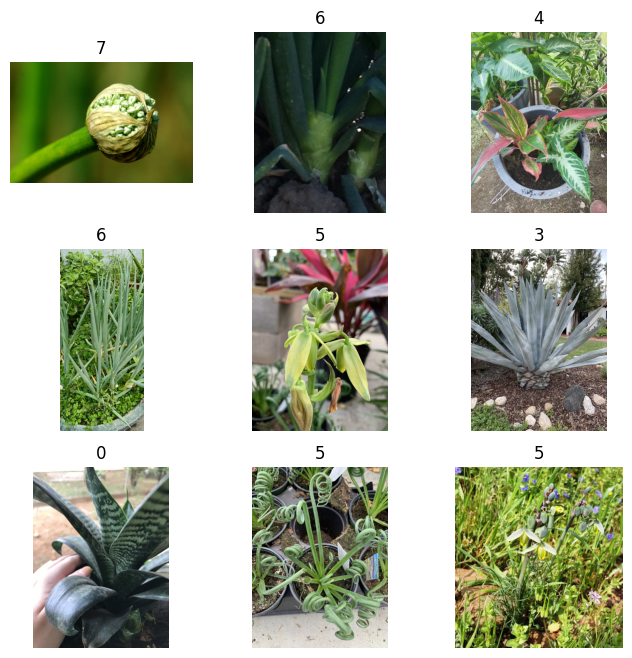

In [7]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(ds), size=(1,)).item()
    img, label = ds[sample_idx]['image'], ds[sample_idx]['label']
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img)
plt.show()

# 3. Оформление датасета как Dataset из Pytorch

In [8]:
class DynamicCropAndResize:
    def __call__(self, image):
        min_size = min(image.size)  # Нахождение минимального размера
        cropped_image = transforms.CenterCrop(min_size)(image)  # Обрезка до минимального размера
        resized_image = transforms.Resize([128, 128])(cropped_image)  # Изменение размера до заданного размера
        return resized_image

to_transform = transforms.Compose([
    DynamicCropAndResize(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class LabelTransform:
    def __call__(self, label):
        #new_label = [0] * 8
        #new_label[label] = 1
        new_label = torch.tensor(label, dtype=torch.float32)
        return new_label

label_to_transform = LabelTransform()
# 0 -> [1, 0, 0, 0, 0, 0, 0, 0]
# 1 -> [0, 1, 0, 0, 0, 0, 0, 0]
# ...

In [9]:
class CustomDataset(Dataset):
    def __init__(self, data, transform = None, label_transform = None):
        self.data = data
        self.transform = transform
        self.label_transform = label_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]['image']
        label = self.data[idx]['label']
        if self.transform:
            image = self.transform(image)
        if self.label_transform:
            label = self.label_transform(label)
        return image, label

custom_dataset = CustomDataset(ds, transform = to_transform, label_transform=label_to_transform)

train_size = int(0.9 * len(custom_dataset)) 
test_size = len(custom_dataset) - train_size 

train_dataset, test_dataset = random_split(custom_dataset, [train_size, test_size])

# 4. Оформление датасета в Dataloader

In [10]:
train_dataloader = DataLoader(train_dataset, batch_size = 40, shuffle=True, num_workers = 0)
test_dataloader = DataLoader(test_dataset, batch_size = 40, shuffle=True, num_workers = 0)

dataset_sizes = {
    'train': len(train_dataset),
    'test': len(test_dataset)
}

dataloaders = {'train': train_dataloader, 'test': test_dataloader}

# 5. Реализация и тренировка своей модели

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [12]:
#device = "cpu"

In [13]:
def train_model(model, dataloader, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels.long())
            
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [14]:
model = nn.Sequential(
    nn.Conv2d(3, 16, 5),
    nn.ELU(),
    nn.MaxPool2d(2),

    nn.Conv2d(16, 16, 11),
    nn.ELU(),
    nn.MaxPool2d(4),

    nn.Conv2d(16, 16, 3),
    nn.ELU(),

    nn.Flatten(),

    nn.Linear(1936, 8), 
    nn.ELU(),
)
model = model.to(device)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(model.parameters(), lr=0.0022, momentum=0.9, weight_decay=0.000001)
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_sgd, step_size=3, gamma=0.1)

In [16]:
model = train_model(model, dataloaders ,criterion, optimizer_sgd, exp_lr_scheduler, num_epochs=10)

Epoch 1/10
----------
train Loss: 2.0795 Acc: 0.1083
test Loss: 2.0555 Acc: 0.1875

Epoch 2/10
----------
train Loss: 2.0029 Acc: 0.2264
test Loss: 1.9510 Acc: 0.2750

Epoch 3/10
----------
train Loss: 1.8426 Acc: 0.3319
test Loss: 1.7061 Acc: 0.4125

Epoch 4/10
----------
train Loss: 1.7447 Acc: 0.3583
test Loss: 1.6563 Acc: 0.4250

Epoch 5/10
----------
train Loss: 1.6896 Acc: 0.3639
test Loss: 1.6514 Acc: 0.4500

Epoch 6/10
----------
train Loss: 1.6765 Acc: 0.3806
test Loss: 1.6252 Acc: 0.4500

Epoch 7/10
----------
train Loss: 1.6580 Acc: 0.3847
test Loss: 1.6230 Acc: 0.4500

Epoch 8/10
----------
train Loss: 1.6598 Acc: 0.3931
test Loss: 1.6201 Acc: 0.4375

Epoch 9/10
----------
train Loss: 1.6569 Acc: 0.3847
test Loss: 1.6323 Acc: 0.4500

Epoch 10/10
----------
train Loss: 1.6575 Acc: 0.3931
test Loss: 1.6235 Acc: 0.4500

Training complete in 4m 28s
Best val Acc: 0.450000


# 6. Обучение с помощью Transfer Learning

In [18]:
model_ft = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 8)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.0022, momentum=0.9)
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

# 7. Метрики качества, выводы